# Neural Networks

## Recent architectures

![Idea](images/Cover.png)

### Keep it simple and clean

![LeNet famous network](images/LeNet.png)
![VGG - 2013](images/deep_CNN.jpg)

### We need two GPU that works separetely, still simple

![AlexNet - 2013](images/AlexNet.png)

### Google says, f**k simplicity

![Idea](images/GoogleNet5.png)
![GoogLeNet - 2014](images/GoogleNet.gif)

### Microsoft answer, Who have it longer?

![ResNet - 2015](images/ResNet.gif)


# Categorization examples

Fashion MNIST is a drop-in replacement for the very well known, machine learning hello world, MNIST dataset. It has same number of training and test examples and the images have the same 28x28 size and there are a total of 10 classes/labels, you can read more about the dataset here : [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)


In this post we will be trying out different models and compare their results:

## List of models

1. 2 Layer Neural Netwoek
2. CNN with 1 Convolutional Layer
3. CNN with 3 Convolutional Layers
4. VGG Like Model
5. VGG Like Model With Batchnorm


## Approach

I split the original training data into 80% training and 20% validation. This helps to see weather we're over-fitting on the training data and weather we should lower the learning rate and train for more epochs if validation accuracy is higher than training accuracy or stop over-training if training accuracy shift higher than the validation.

To be consistent here, all the models are initially trained for 10 epochs and another 10 epochs with a lower learning late. After the initial 20 epochs, I added data augmentation, which generates new training samples by rotating, shifting and zooming on the training samples, and trained for another 50 epochs.

Also, to avoid hot encoding the labels, I decided to use `sparse_categorical_crossentropy` when compiling the models.

## Observations
All the models achieved a higher accuracy after using data augmentation. Almost always use data augmentation!!

VGG Like Model With Batchnorm performed the best and achieved a accuarcy of 94% using data augmentation.


## Fun Fact

If you uncomment the code in **Drop-in Replacement you said?** section, you'll be able to run all the models on MNIST instead of Fashion-MNIST.
It is much easier to get +99.5% results on MNIST. However, as you can see by running the models on both datasets, it gets relatively harder to squeeze accuracy on the Fashion-MNIST dataset. 


# Required Libaries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

Using TensorFlow backend.


# Download and Load Fashion-MNIST

In [2]:
batch_size = 512

In [3]:
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')

In [4]:
def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [5]:
X_train_orig, y_train_orig = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

## Drop-in Replacement you said?
As I said at the beginning, fashion MNIST is drop-in replacement for MNINT. In case you want to run all these models on MNIST and compare the results. Uncomment the next section and everything should work automatically.

In [6]:
# from keras.datasets import mnist
# (X_train_orig, y_train_orig), (X_test, y_test) = mnist.load_data()
# X_train_orig = X_train_orig.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# X_train_orig = X_train_orig.astype('float32')
# X_test = X_test.astype('float32')
# X_train_orig /= 255
# X_test /= 255

In [7]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


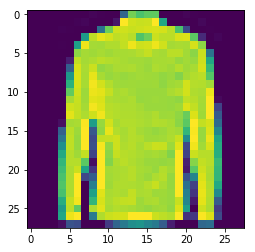

In [10]:
plt.imshow(X_train[1, :].reshape((28, 28)))

# 2 Layer Neural Network

In [11]:
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874.0
Trainable params: 468,874
Non-trainable params: 0.0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s - loss: 0.6287 - acc: 0.7819 - val_loss: 0.4195 - val_acc: 0.8572
Epoch 2/20
48000/48000 [==============================] - 2s - loss: 0.4128 - acc: 0.8553 - val_loss: 0.3899 - val_acc: 0.8665
Epoch 3/20
48000/48000 [==============================] - 2s - loss: 0.3719 - acc: 0.8670 - val_loss: 0.3549 - val_acc: 0.8808
Epoch 4/20
48000/48000 [==============================] - 2s - loss: 0.3386 - acc: 0.8783 - val_loss: 0.3286 - val_acc: 0.8864
Epoch 5/20
48000/48000 [==============================] - 2s - loss: 0.3167 - acc: 0.8866 - val_loss: 0.3122 - val_acc: 0.8894
Epoch 6/20
48000/48000 [==============================] - 2s - loss: 0.2975 - acc: 0.8926 - val_loss: 0.3272 - val_acc: 0.8846
Epoch 7/20
48000/48000 [==============================] - 2s - loss: 0.2860 - acc: 0.8954 - val_loss: 0.3130 - val_acc: 0.8907
Epoch 8/20
48000/48000 [==============================] - 2s 

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3474293149590492
Test accuracy: 0.8858


# CNN with 1 Convolutional Layer

In [16]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [17]:
cnn1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962.0
Trainable params: 693,962.0
Non-trainable params: 0.0
________________________________________________________________

In [19]:
cnn1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [20]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s - loss: 0.6536 - acc: 0.7764 - val_loss: 0.4224 - val_acc: 0.8552
Epoch 2/10
48000/48000 [==============================] - 17s - loss: 0.4005 - acc: 0.8596 - val_loss: 0.3476 - val_acc: 0.8806
Epoch 3/10
48000/48000 [==============================] - 16s - loss: 0.3475 - acc: 0.8772 - val_loss: 0.3211 - val_acc: 0.8892
Epoch 4/10
48000/48000 [==============================] - 19s - loss: 0.3233 - acc: 0.8843 - val_loss: 0.2995 - val_acc: 0.8959
Epoch 5/10
48000/48000 [==============================] - 16s - loss: 0.2997 - acc: 0.8940 - val_loss: 0.2794 - val_acc: 0.9042
Epoch 6/10
48000/48000 [==============================] - 19s - loss: 0.2864 - acc: 0.8978 - val_loss: 0.2787 - val_acc: 0.9020
Epoch 7/10
48000/48000 [==============================] - 17s - loss: 0.2724 - acc: 0.9032 - val_loss: 0.2712 - val_acc: 0.9057
Epoch 8/10
48000/48000 [==============================

In [21]:
cnn1.optimizer.lr = 0.0001

In [22]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s - loss: 0.2363 - acc: 0.9138 - val_loss: 0.2463 - val_acc: 0.9132
Epoch 2/10
48000/48000 [==============================] - 19s - loss: 0.2258 - acc: 0.9184 - val_loss: 0.2446 - val_acc: 0.9139
Epoch 3/10
48000/48000 [==============================] - 17s - loss: 0.2212 - acc: 0.9193 - val_loss: 0.2372 - val_acc: 0.9168
Epoch 4/10
48000/48000 [==============================] - 18s - loss: 0.2111 - acc: 0.9228 - val_loss: 0.2362 - val_acc: 0.9164
Epoch 5/10
48000/48000 [==============================] - 18s - loss: 0.2073 - acc: 0.9235 - val_loss: 0.2264 - val_acc: 0.9192
Epoch 6/10
48000/48000 [==============================] - 18s - loss: 0.1975 - acc: 0.9274 - val_loss: 0.2255 - val_acc: 0.9220
Epoch 7/10
48000/48000 [==============================] - 21s - loss: 0.1921 - acc: 0.9298 - val_loss: 0.2332 - val_acc: 0.9152
Epoch 8/10
48000/48000 [==============================

In [23]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2516407194644213
Test accuracy: 0.912


### Data Augmentation

In [24]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)

In [27]:
cnn1.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=10, 
                    validation_data=val_batches, validation_steps=12000//batch_size)

Epoch 1/10
82/93 [=========================>....] - ETA: 2s - loss: 0.3995 - acc: 0.8489

KeyboardInterrupt: 

In [ ]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# CNN with 3 Convolutional Layers

In [ ]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
cnn2.optimizer.lr = 0.0001

In [ ]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Data Augmentation

In [ ]:
cnn2.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size)

In [ ]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# CNN with 4 Convolutional Layers and Batch Normalization

In [ ]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [ ]:
cnn3 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
cnn3.optimizer.lr = 0.0001

In [ ]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Data Augmentation

In [ ]:
cnn3.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size)

In [ ]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# VGG Like Model

In [ ]:
cnn4 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn4.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
cnn4.optimizer.lr = 0.0001

In [ ]:
cnn4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
score = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Data Augmentation

In [ ]:
cnn4.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

In [ ]:
score = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# VGG Like Model With Batchnorm

In [ ]:
cnn5 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),    
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn5.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
cnn5.optimizer.lr = 0.0001

In [ ]:
cnn5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
score = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Data Augmentation

In [ ]:
cnn5.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

In [ ]:
score = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])